<a href="https://colab.research.google.com/github/hydermbs/data_science_projects/blob/main/guftugu_publication_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Essential Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded= files.upload()

Saving GP Orders - 5.csv to GP Orders - 5.csv


In [125]:
gpa = pd.read_csv('GP Orders - 5.csv')
gpa.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [13]:
gpa.shape

(19239, 8)

In [17]:
gpa.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

In [18]:
gpa.dropna(axis=0,inplace = True)

In [34]:
gpa['Book Name'].unique()

array(['Kaggle for Begginers',
       'Kaggle for Begginers/Bitcoin Blockchain aur Crypto Currency - FREE E-Book',
       'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی',
       ...,
       'Blockchain, Cryptocurrency And Bitcoin/Column Nigari Kese Sekhain',
       'مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/Blockchain, Cryptocurrency And Bitcoin/Python Programming/انٹرنیٹ سے پیسہ کمائیں/R ka Taaruf/Introduction to Blockchain with Case Studies/Linux - An Introduction/Kaggle for Begginers',
       'Linux - An Introduction/Python Programming/Kaggle for Begginers/Artificial Intelligence/ایک تھا الگورتھم/R ka Taaruf/مشین لرننگ'],
      dtype=object)

# **• What is the best-selling book?**


In [57]:
books = gpa['Book Name'].str.split('/',expand=False)
#flatting books
flat_list = []
for i in books:
  if type(i) is list:
    for ele in i:
      flat_list.append(ele)
  else:
    flat_list.append(i)
books=pd.Series(flat_list)
print('Most Selling Books \n')
books.value_counts().nlargest()

Most Selling Books 



انٹرنیٹ سے پیسہ کمائیں                    3507
Python Programming                        2412
Artificial Intelligence                   2104
Blockchain, Cryptocurrency And Bitcoin    1905
Product Management                        1553
dtype: int64

Text(0.5, 1.0, 'Best Selling Books')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)


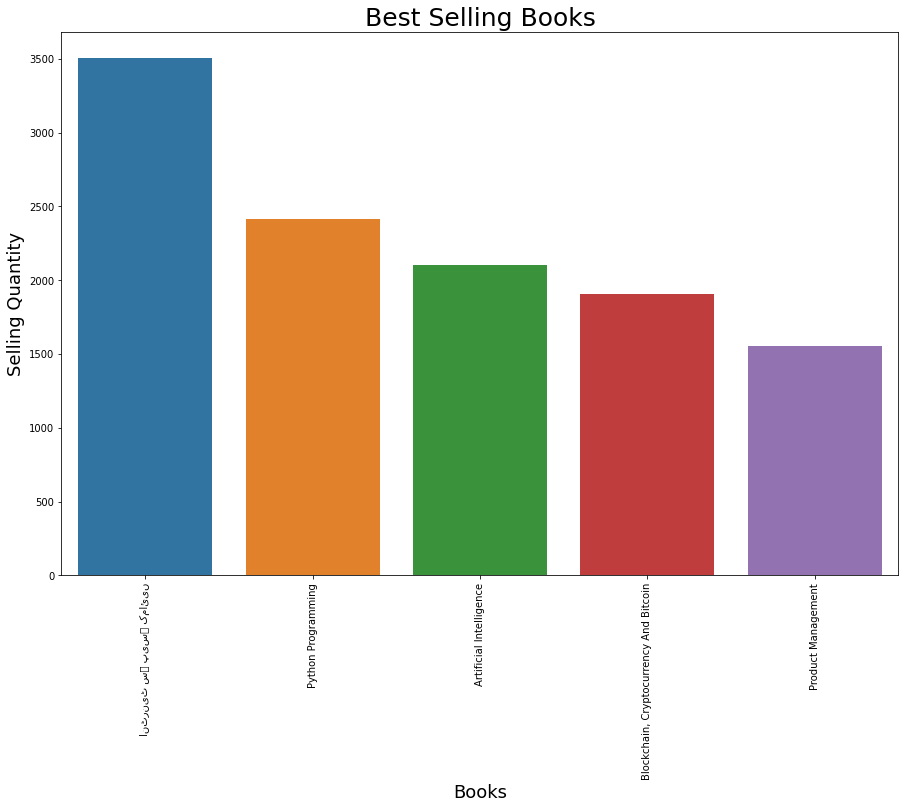

In [70]:
most = pd.DataFrame(books.value_counts().nlargest()).reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x=most['index'],y=most[0])
plt.xlabel('Books',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Selling Quantity',fontsize=18)
plt.title('Best Selling Books',fontsize=25)

# **Visualization of Order Status Frequency**

In [82]:
status_fre = pd.DataFrame(gpa['Order Status'].value_counts()).reset_index()
status_fre.columns

Index(['index', 'Order Status'], dtype='object')

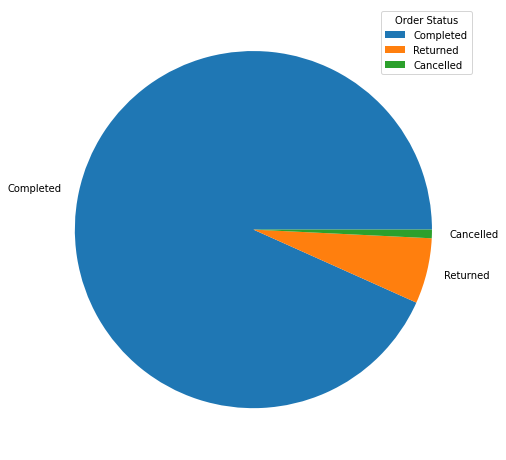

In [85]:
#Visualization
labels = status_fre['index']
plt.figure(figsize=(8,10))
plt.pie(status_fre['Order Status'],labels=labels)
plt.legend(title="Order Status")
plt.show() 

# **• Find a correlation between date and time with order status**


In [120]:
gpa_new = pd.DataFrame(gpa[['Order Date & Time', 'Order Status']])
gpa_new['Order Date & Time'] = gpa_new['Order Date & Time'].astype('category').cat.codes
gpa_new['Order Status'] = gpa_new['Order Status'].astype('category').cat.codes
corre = gpa_new['Order Date & Time'].corr(gpa_new['Order Status'])
print(corre)


-0.07483271110431142


# **Order Status Year Wise**

In [145]:
gpa["Order Date & Time"] = pd.to_datetime(gpa["Order Date & Time"])
gpa["Year"] = gpa["Order Date & Time"].dt.year
gpa_year = pd.DataFrame(gpa[['Year','Order Status']].value_counts()).reset_index()
gpa_year.groupby(['Year','Order Status',0]).count()

Empty DataFrame
Columns: []
Index: [(2019, Cancelled, 26), (2019, Completed, 426), (2020, Cancelled, 117), (2020, Completed, 15048), (2020, Returned, 943), (2021, Cancelled, 6), (2021, Completed, 2474), (2021, Returned, 199)]

Text(0.5, 1.0, 'Bar Plot of Order Status Year Wise')

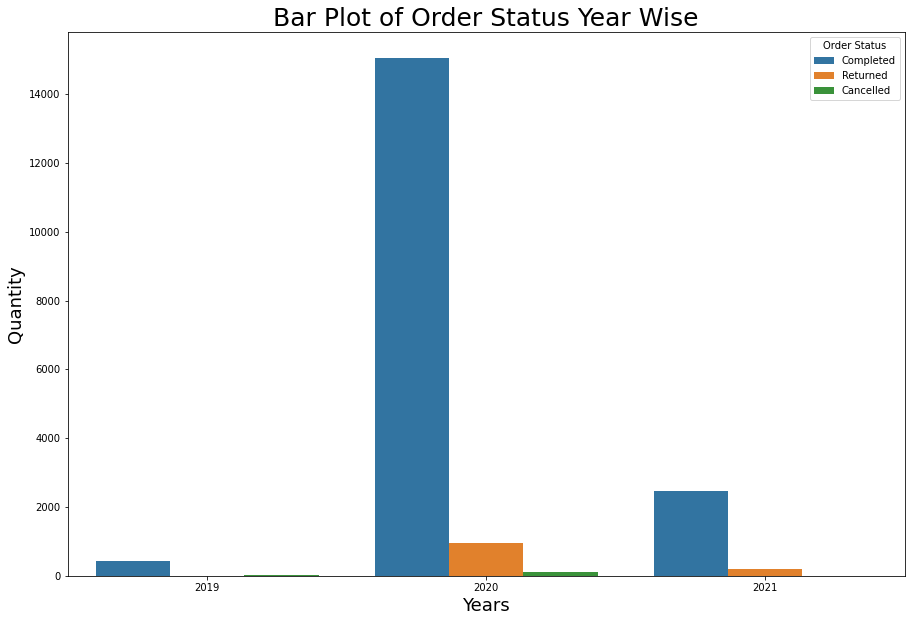

In [146]:
plt.figure(figsize=(15,10))
sns.barplot(x=gpa_year['Year'],y=gpa_year[0],hue=gpa_year['Order Status'])
plt.xlabel('Years',fontsize=18)
plt.ylabel('Quantity',fontsize=18)
plt.title('Bar Plot of Order Status Year Wise',fontsize=25)

# **• Find a correlation between city and order status**


In [150]:
gpa_city = pd.DataFrame(gpa[['City', 'Order Status']])
gpa_city['City'] = gpa_city['City'].astype('category').cat.codes
gpa_city['Order Status'] = gpa_city['Order Status'].astype('category').cat.codes
corr_city=gpa_city.corr()
print(corr_city)

                 City  Order Status
City          1.00000       0.01728
Order Status  0.01728       1.00000


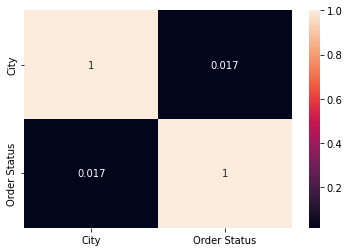

In [152]:
#Correlation between City and Order Status with Heat map
sns.heatmap(corr_city,annot=True)

# **Order Status City Wise**

In [168]:
gpa_city_status = pd.DataFrame(gpa[['City','Order Status']].value_counts().nlargest(10)).reset_index()
#Change name of city
gpa_city_status.groupby(['City','Order Status',0]).count().sort_values(0,ascending=False)

,,
City,Order Status,0
Karachi,Completed,2242
Lahore,Completed,1911
Islamabad,Completed,816
Rawalpindi,Completed,616
Faisalabad,Completed,454
Multan,Completed,399
Peshawar,Completed,396
Gujranwala,Completed,245
karachi,Completed,227


Text(0.5, 1.0, 'City Wise Orders')

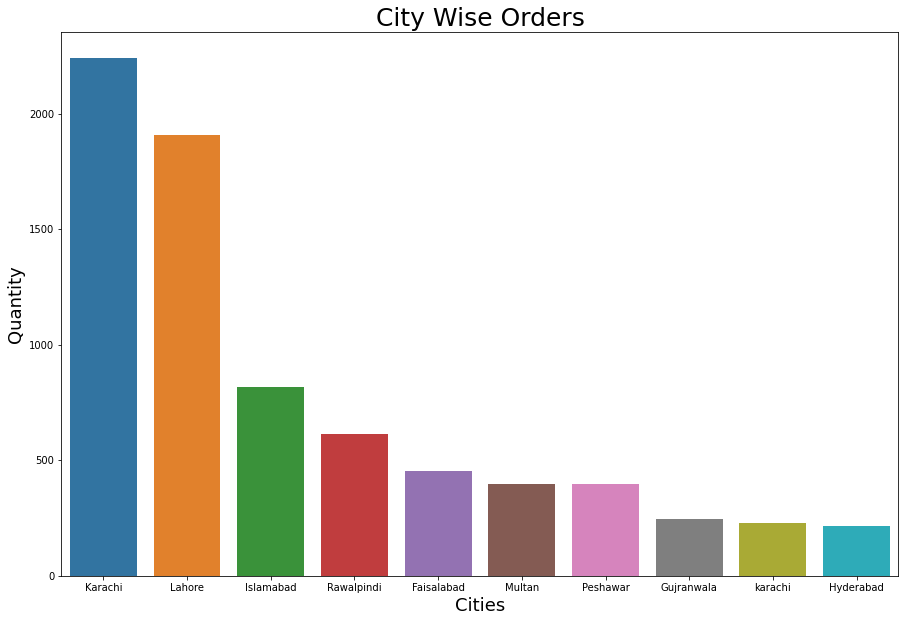

In [171]:
#Visualize Data
x_axis= gpa_city_status['City']
y_axis = gpa_city_status[0]
plt.figure(figsize=(15,10))
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Cities',fontsize=18)
plt.ylabel('Quantity',fontsize=18)
plt.title('City Wise Orders',fontsize=25)

# **• Find any hidden patterns that are counter-intuitive for a layman**


In [172]:
gpa['Payment Method'].unique()

array([nan, 'Cash on Delivery (COD)', 'Cash on delivery', 'EasyPaisa',
       'JazzCash', 'BankTransfer'], dtype=object)

In [177]:
gpa['Payment Method']=gpa['Payment Method'].replace({'Cash on Delivery (COD)':'Cash On Delivery','Cash on delivery':'Cash On Delivery'})
payment = gpa.groupby('Payment Method')['Payment Method'].count()
payment

Payment Method
BankTransfer          459
Cash On Delivery    17477
EasyPaisa             697
JazzCash              596
Name: Payment Method, dtype: int64

# **Visualize Data Of Payment Method Status**

Text(0.5, 1.0, 'Payment Methods Status')

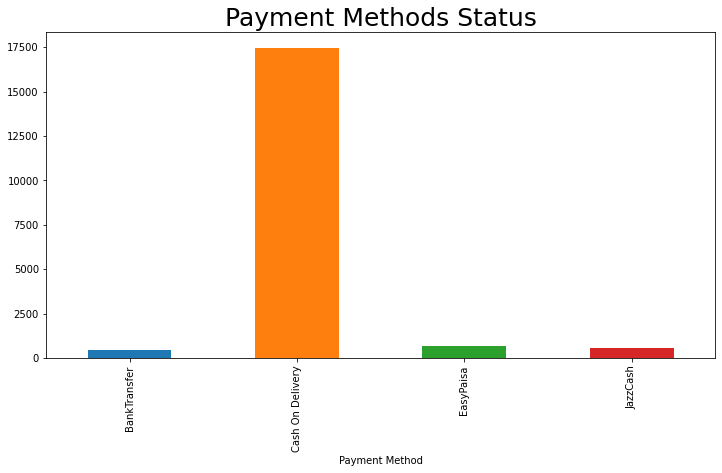

In [186]:
plt.figure(figsize=(12,6))
payment.plot.bar(color=sns.color_palette("tab10"))
plt.title('Payment Methods Status',fontsize=25)

Text(0.5, 1.0, 'Order Status According to Payment Methods')

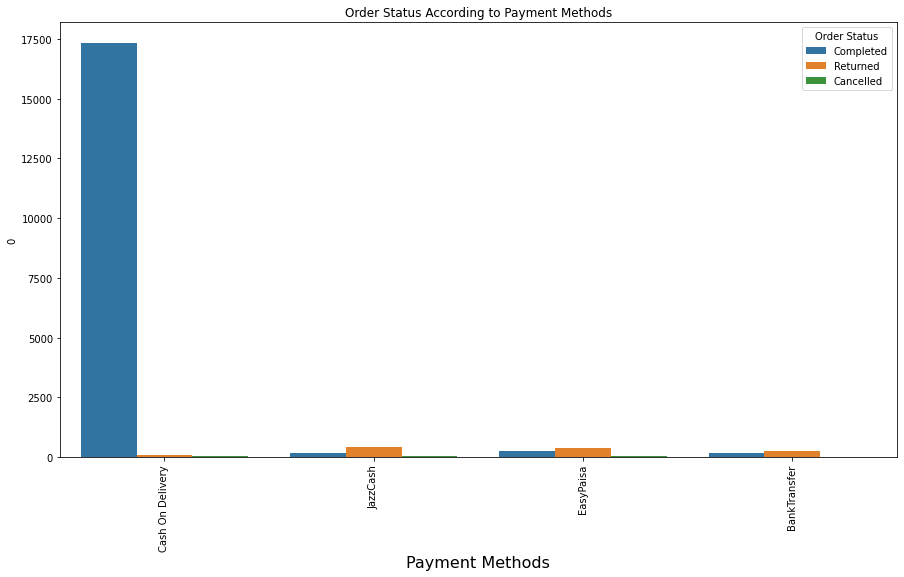

In [194]:
payment_method_status = gpa[['Payment Method','Order Status']].value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=payment_method_status['Payment Method'],y=payment_method_status[0],hue=payment_method_status['Order Status'])
plt.xticks(rotation=90)
plt.xlabel('Payment Methods',fontsize=16)
plt.title('Order Status According to Payment Methods')
